In [1]:
%autosave 60

Autosaving every 60 seconds


# Домашнее задание EDA | МТС Тета
-----
- Нужно провести EDA любого датасета на ваше усмотрение в специально подготовленном ipynb
- В этом ноутбуке будут блоки под разные типы графиков
- Нужно выбрать такой датасет, который позволит построить каждый из этих графиков корректно
- В ноутбуке так же будет дополнительное поле для графика на ваш выбор. В нем должен быть график, который не был построен ранее в ноутбуке (другой тип графика)
- Ноутбук должен отбегать в режиме run all, а так же сохранять все изображения шаблонным образом, как заложено в ноутбуке
- Для каждого графика должны быть написаны выводы
- __Вместе с ноутбуком нужно сдать сохраненные изображения (проверьте корректность их сохранения перед отправкой ДЗ)__
- изображения должны быть в формате png или jpeg. Не сохраняйте изображения в html (так делает plotly)
____
**Критерии оценки**
- Вы построили все основные графики без критических ошибок – 8 баллов
- Вы выполнили пункт 1, а так же построили дополнительный график - 10 баллов
- Доп. баллы выставляются за победу в tinder игре – подробности будут позже. Но чтобы в ней победить, ваш график должен оказаться самым красивым. 
- Доп. Баллы получат топ 10 человек итогового рейтинга. 
---
- Максимум 10 баллов (и +5 дополнительных)
- 1-4 балла: незачет
- 5-6 баллов: 3, незачет
- 7-8 баллов: 4, зачет
- 9-10 баллов: 5, зачет

## подготовка

In [2]:
import os

import seaborn as sns
import pandas as pd
import numpy as np
from phik import resources
from phik.report import plot_correlation_matrix

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import mplcyberpunk

from IPython.display import display

import requests
from io import BytesIO

In [3]:
plt.style.use("cyberpunk")

In [4]:
# подставьте ваше имя и фамилию в эту переменную как в примере, (например Максим_Шаланкин)
image_name_prefix = 'Егор_Василенко'

# можно поменять, а можно оставить - сюда будут сохраняться изображения
path_to_save_images = 'images'

In [5]:
os.makedirs(path_to_save_images, exist_ok=True)

## Загрузка датасета и его предварительный анализ

Решил выбрать этот датасет ради пингвинов )

Но вообще мне он показался достаточно интересным для EDA анализа, в том числе тем, как это все отобразить на графиках - не знаю, получилось ли в итоге.

In [6]:
df = pd.read_csv('penguins_lter.csv')

In [7]:
df['Date Egg'] = pd.to_datetime(df['Date Egg'], format='%m/%d/%y')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   studyName            344 non-null    object        
 1   Sample Number        344 non-null    int64         
 2   Species              344 non-null    object        
 3   Region               344 non-null    object        
 4   Island               344 non-null    object        
 5   Stage                344 non-null    object        
 6   Individual ID        344 non-null    object        
 7   Clutch Completion    344 non-null    object        
 8   Date Egg             344 non-null    datetime64[ns]
 9   Culmen Length (mm)   342 non-null    float64       
 10  Culmen Depth (mm)    342 non-null    float64       
 11  Flipper Length (mm)  342 non-null    float64       
 12  Body Mass (g)        342 non-null    float64       
 13  Sex                  334 non-null  

In [9]:
display(df.head())

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [10]:
print("Количество пропусков в абсолютных и относительных значениях:")
display(pd.DataFrame({
    'Total NaN': df.isna().sum(),
    'Percentage NaN': df.isna().mean() * 100
}).style.background_gradient('coolwarm').format({'Percentage NaN': '{:.2f}%'}))

Количество пропусков в абсолютных и относительных значениях:


,Total NaN,Percentage NaN
studyName,0,0.00%
Sample Number,0,0.00%
Species,0,0.00%
Region,0,0.00%
Island,0,0.00%
Stage,0,0.00%
Individual ID,0,0.00%
Clutch Completion,0,0.00%
Date Egg,0,0.00%
Culmen Length (mm),2,0.58%


## EDA анализ

## (1) line plot

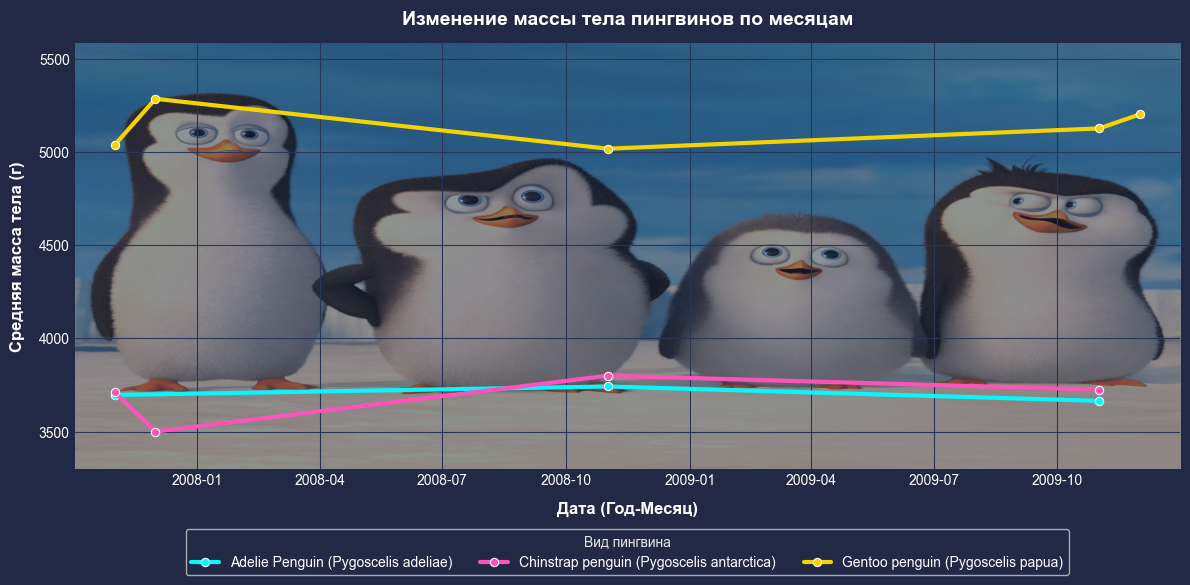

In [11]:
# Группируем по месяцу и виду пингвина, считаем среднюю массу тела
df['Year-Month'] = df['Date Egg'].dt.to_period('M')
df_plot = df.groupby(['Year-Month', 'Species'])['Body Mass (g)'].mean().reset_index()

# Преобразуем обратно в datetime для корректного отображения на графике
df_plot['Year-Month'] = df_plot['Year-Month'].astype(str)
df_plot['Year-Month'] = pd.to_datetime(df_plot['Year-Month'])

# Загружаем изображение с URL для фона
img_url = "https://avatars.mds.yandex.net/i?id=0b726639875156a0d53d43f7bee9a53c_l-4008581-images-thumbs&n=13"
response = requests.get(img_url)
img = mpimg.imread(BytesIO(response.content), format='jpg')

# Создаём фигуру
fig, ax = plt.subplots(figsize=(12, 6))

# Устанавливаем фон
ax.imshow(img, extent=[df_plot['Year-Month'].min() - pd.Timedelta(days=30), 
                       df_plot['Year-Month'].max() + pd.Timedelta(days=30), 
                       df_plot['Body Mass (g)'].min() - 200, 
                       df_plot['Body Mass (g)'].max() + 300], 
          aspect='auto', alpha=0.5)

# Line Plot
sns.lineplot(data=df_plot, x='Year-Month', y='Body Mass (g)', hue='Species', marker='o', linewidth=3, ax=ax)

ax.set_title("Изменение массы тела пингвинов по месяцам", fontsize=14, color='white', fontweight='bold', pad=14)
ax.set_xlabel("Дата (Год-Месяц)", fontsize=12, color='white', fontweight='bold', labelpad=10)
ax.set_ylabel("Средняя масса тела (г)", fontsize=12, color='white', fontweight='bold', labelpad=10)
plt.xticks(fontsize=10, color='white')
plt.yticks(fontsize=10, color='white')

legend = plt.legend(title="Вид пингвина", fontsize=10, title_fontsize=10, 
                    loc='upper center', bbox_to_anchor=(0.5, -0.125), frameon=True, ncol=3)

for text in legend.get_texts():
    text.set_color('white')

plt.tight_layout()

# Этот код сохраняет картинку для отправки ДЗ
plt.savefig(
    os.path.join(path_to_save_images, f'{image_name_prefix}_image_1.png')
)

### Изменение массы тела пингвинов по месяцам

**Вывод:**
График показывает динамику изменения массы тела у пингвинов трех видов (`Adelie`, `Chinstrap`, `Gentoo`).  
- У Gentoo масса стабильно выше, однако стабильно без колебаний только вид `Adelie`.  
- Есть интересный момент с тем, что в моменты увеличения массы `Gentoo` уменьшается масса `Chinstrap` - возможно, в эти периоды либо менялись условия пропитания, когда у одних были излишние запасы, а у других по каким-то причинам не было, либо одни у других их забирали (вряд-ли, но я даже изучу такую возможность в будущем).  
- Опять же, все изменения возможно связаны с сезонными изменениями в питании и размножении.  

## (2) (bar plot или stacked bar plot)

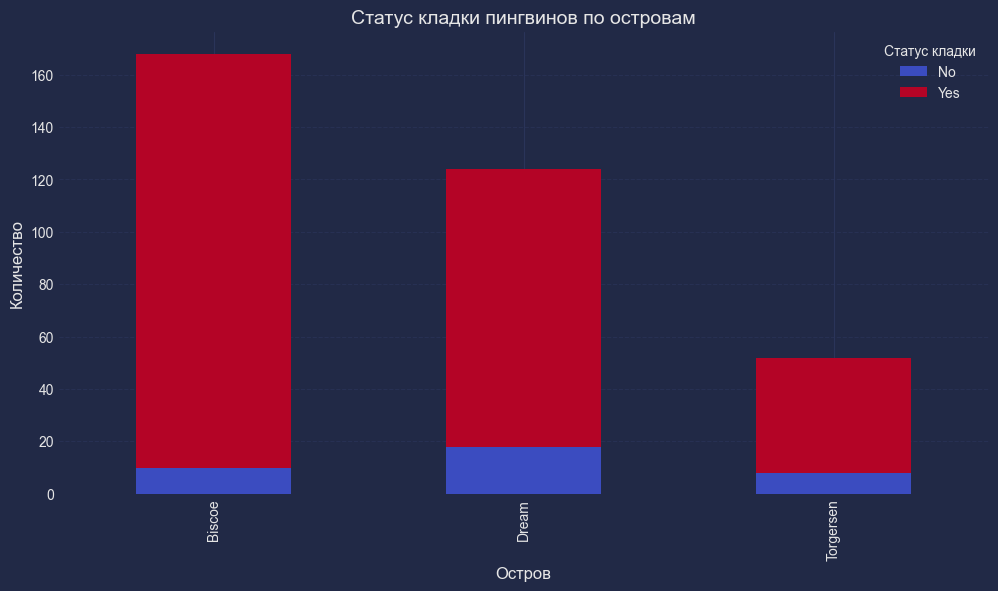

In [12]:
# Создаём таблицу частот
island_clutch_counts = pd.crosstab(df['Island'], df['Clutch Completion'])

# Построение Stacked Bar plot
island_clutch_counts.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12, 6))

plt.title("Статус кладки пингвинов по островам", fontsize=14)
plt.xlabel("Остров", fontsize=12)
plt.ylabel("Количество", fontsize=12)
plt.legend(title="Статус кладки")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Этот код сохраняет картинку для отправки ДЗ
plt.savefig(
    os.path.join(path_to_save_images, f'{image_name_prefix}_image_2.png')
)

### Статус кладки пингвинов по островам

**Вывод:**
- Наибольшее количество пингвинов обитает на островах `Biscoe` и `Dream`.  
- Почти все пингвины завершают кладку, но на острове Torgersen кладок меньше, что может указывать на особые условия среды, хотя вот у на `Biscoe` хоть и больше пингвинов, но кладки меьше - возможно, менее подходящие условия или неравномерное распределение самок и самцов.  
- В целом, данный график помогает понять разницу в размножении пингвинов на разных островах.  

##  (3) (hist plot или pair plot или kde plot)

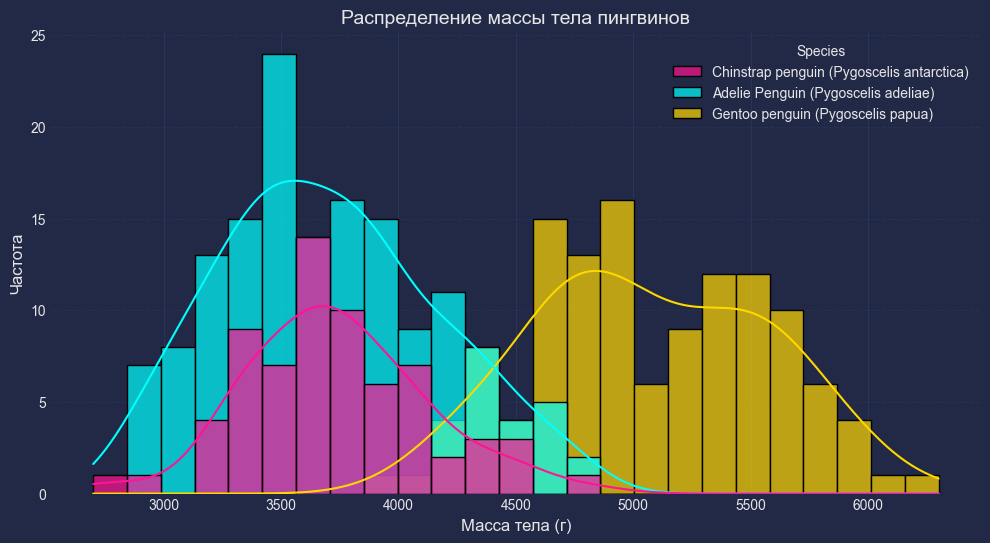

In [13]:
# Определяем цвета вручную (для сопоставления легенды)
species_palette = {
    "Chinstrap penguin (Pygoscelis antarctica)": "#FF1493",
    "Adelie Penguin (Pygoscelis adeliae)": "#00FFFF",
    "Gentoo penguin (Pygoscelis papua)": "#FFD700"
}

# Порядок отрисовки слоёв (чтобы розовый был впереди)
hue_order = ["Chinstrap penguin (Pygoscelis antarctica)",
             "Adelie Penguin (Pygoscelis adeliae)",
             "Gentoo penguin (Pygoscelis papua)"]

# Создание фигуры
plt.figure(figsize=(12, 6))

# Гистограмма с разбиением по видам пингвинов
sns.histplot(data=df, x='Body Mass (g)', hue='Species', hue_order=hue_order, bins=25, kde=True, palette=species_palette, alpha=0.7) 
#не знаю, стоит ли добавлять multiple="dodge", но с ним выглядит странно

plt.title("Распределение массы тела пингвинов", fontsize=14)
plt.xlabel("Масса тела (г)", fontsize=12)
plt.ylabel("Частота", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Этот код сохраняет картинку для отправки ДЗ
plt.savefig(
    os.path.join(path_to_save_images, f'{image_name_prefix}_image_3.png')
)

### Распределение массы тела пингвинов

**Вывод:**
Гистограмма четко разделяет три вида пингвинов по массе:
- `Adelie` (голубой) – самый многочисленный вид, масса тела от 3 000 до 4 000 г.
- `Chinstrap` (розовый) – меньше по численности, но схожи по массе с Adelie.
- `Gentoo` (желтый) – самые крупные пингвины, масса от 4 500 до 6 000 г.

*Отсюда можно сделать вывод, что график позволяет увидеть ключевые различия между видами и их распределение по массе.*

##  (4) heatmap plot

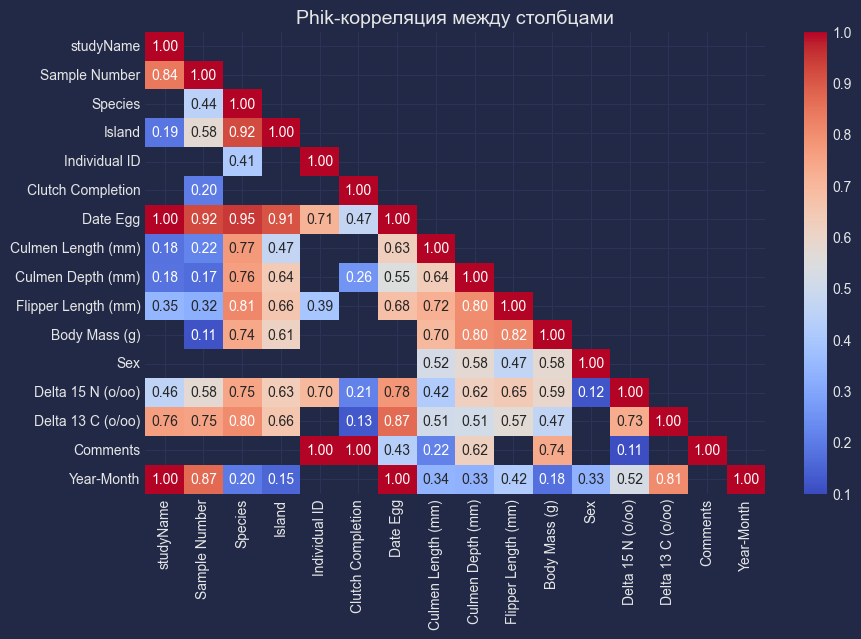

In [14]:
num_cols = ['Sample Number', 'Culmen Length (mm)', 'Culmen Depth (mm)', 
            'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

df_filtered = df.drop(columns=['Region', 'Stage'], errors="ignore")

phik_corr = df_filtered.phik_matrix(interval_cols=num_cols)

# Создаём маску для скрытия части выше главной диагонали
mask = np.triu(np.ones_like(phik_corr, dtype=bool), k=1)

# Убираем слабые корреляции
phik_corr_filtered = phik_corr.copy()
phik_corr_filtered[phik_corr_filtered < 0.1] = np.nan #условное ограничение - решил убрать ниже 0.1

plt.figure(figsize=(10, 6))
sns.heatmap(phik_corr_filtered, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', vmin=0.1, vmax=1)

plt.title("Phik-корреляция между столбцами", fontsize=14)

# Этот код сохраняет картинку для отправки ДЗ
plt.savefig(
    os.path.join(path_to_save_images, f'{image_name_prefix}_image_4.png')
)

### Phik-корреляция факторов

**Вывод:** <br>
Рассмотрим степень связи между переменными:
- Масса тела (`Body Mass`) сильно связана с длиной крыла (`Flipper Length`) и клюва (`Culmen Length, Depth`).
- `Species` (вид пингвина) определяет массу, размеры клюва и крыла, но не влияет на дату яйца (`Date Egg`).
- `Year-Month` почти не влияет на другие параметры, что говорит об отсутствии сезонных изменений в размере пингвинов.

*График помогает понять, какие параметры влияют друг на друга и выявить ключевые зависимости, причем из него убраны элементы выше главной диагонали и значения коэффициентов ниже 0.1.*

##  (5) plot  на ваш выбор: Swarm plot массы тела по островам

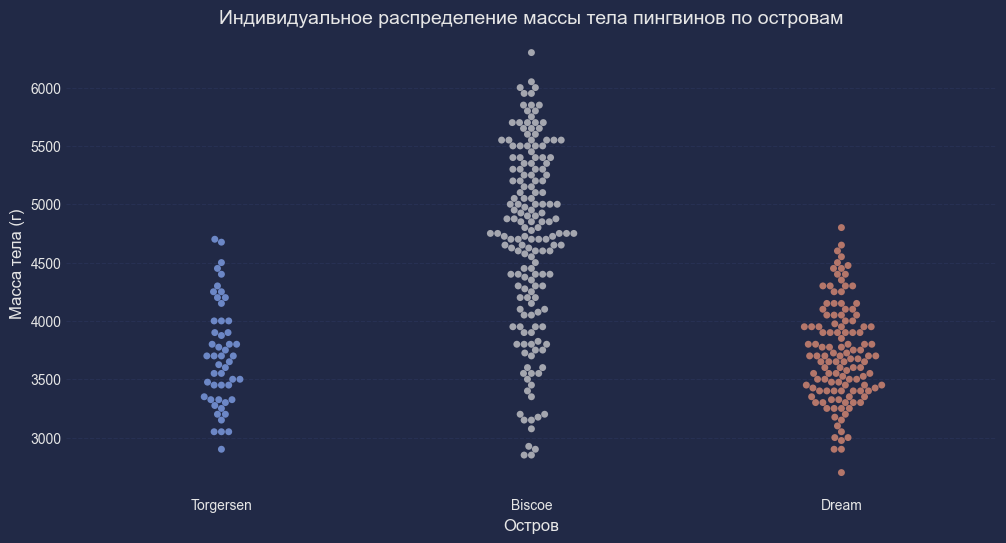

In [15]:
plt.figure(figsize=(12, 6))

sns.swarmplot(data=df, x='Island', y='Body Mass (g)', hue='Island', palette='coolwarm', alpha=0.7)

plt.title("Индивидуальное распределение массы тела пингвинов по островам", fontsize=14)
plt.xlabel("Остров", fontsize=12)
plt.ylabel("Масса тела (г)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Этот код сохраняет картинку для отправки ДЗ
plt.savefig(
    os.path.join(path_to_save_images, f'{image_name_prefix}_image_5.png')
)

### Индивидуальное распределение массы тела пингвинов по островам

**Вывод:** <br>
Рассмотрим распределение массы тела на каждом острове (дополнительно к тому, что уже рассмотрели с разделением на виды):
- `Biscoe` – наибольшее разнообразие по массе.
- `Dream` и `Torgersen` – пингвины меньшего размера, особенно на `Torgersen`.
- Видны отдельные выбросы (крайние точки), которые могут быть аномальными значениями.
- И в целом можно лицезреть, чья популяция бльше. В порядке убывания: `Biscoe`, `Dream` и `Torgersen`.

*Этот график полезен для анализа индивидуальных различий внутри каждой популяции.*

# Итоговый вывод по всему датасету (по всему EDA)

Можно заключить несколько закономерностей:

- Масса тела различается по видам: `Gentoo` — самые крупные, `Adelie` — самые многочисленные, `Chinstrap` — менее распространены, но схожи по массе с `Adelie`.  
- Корреляционный анализ показал, что масса тела связана с длиной крыла и клюва, но не зависит от даты откладывания яиц. Сезонность практически не влияет на размер пингвинов.  
- Распределение кладок отличается по островам: на `Biscoe` и `Dream`кладок больше, а на `Torgersen` их меньше, что может говорить о менее благоприятных условиях для размножения.  
- В динамике массы тела у `Gentoo` она остается стабильной, у `Chinstrap` наблюдаются колебания, которые могут быть связаны с условиями питания.  
- Масса тела также зависит от острова. На `Biscoe` наблюдается наибольший разброс значений, а на `Torgersen` преобладают более легкие особи.  

Вид, среда обитания и, возможно, сезонные изменения оказывают влияние на массу тела и размножение пингвинов